In [1]:
# Phase 3: Neural Baseline Models
# Store Sales Forecasting with LSTM, GRU, and Advanced Neural Networks

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Add project source to path
sys.path.insert(0, '../src')

# Import our existing infrastructure
from data.evaluation_cases import EvaluationCaseManager
from models.neural.neural_baselines import NeuralBaselines

# PyTorch imports
import torch
import torch.nn as nn

print("=" * 60)
print("🧠 PHASE 3: NEURAL BASELINE MODELS")
print("=" * 60)
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name()}")

🧠 PHASE 3: NEURAL BASELINE MODELS
PyTorch version: 2.2.2
CUDA available: False


In [2]:
# ============================================================================
# SECTION 1: LOAD INFRASTRUCTURE AND DATA
# ============================================================================

print("\n📋 Section 1: Infrastructure Setup")
print("-" * 40)

# Load evaluation cases (same 10 cases from Phase 2)
case_manager = EvaluationCaseManager()
evaluation_cases = case_manager.get_cases_list()

print(f"✅ Loaded {len(evaluation_cases)} evaluation cases")
print(f"✅ Using established train/test split: 2017-07-01")

# Display case summary
print("\n📊 Evaluation Cases Summary:")
for i, case in enumerate(evaluation_cases, 1):
    store = case['store_nbr']
    family = case['family']
    quality = case.get('selection_metrics', {}).get('quality_score', 0)
    print(f"  {i:2d}. Store {store:2d} - {family:30s} (Quality: {quality:.1f})")


📋 Section 1: Infrastructure Setup
----------------------------------------
✅ Loaded 10 evaluation cases
✅ Using established train/test split: 2017-07-01

📊 Evaluation Cases Summary:
   1. Store 49 - PET SUPPLIES                   (Quality: 98.3)
   2. Store  8 - PET SUPPLIES                   (Quality: 98.1)
   3. Store 44 - SCHOOL AND OFFICE SUPPLIES     (Quality: 99.2)
   4. Store 45 - SCHOOL AND OFFICE SUPPLIES     (Quality: 99.0)
   5. Store 39 - MEATS                          (Quality: 98.6)
   6. Store 53 - PRODUCE                        (Quality: 98.5)
   7. Store 26 - FROZEN FOODS                   (Quality: 98.9)
   8. Store 46 - SCHOOL AND OFFICE SUPPLIES     (Quality: 98.8)
   9. Store 47 - SCHOOL AND OFFICE SUPPLIES     (Quality: 98.8)
  10. Store 48 - SCHOOL AND OFFICE SUPPLIES     (Quality: 98.6)


In [3]:
# ============================================================================
# SECTION 2: LOAD PHASE 2 BASELINE RESULTS FOR COMPARISON
# ============================================================================

print("\n📈 Section 2: Loading Phase 2 Baseline Results")
print("-" * 40)

try:
    # Load traditional baseline results from Phase 2
    import json
    with open('../results/traditional_baseline_results.json', 'r') as f:
        traditional_results = json.load(f)
    
    # Extract summary statistics
    traditional_summary = traditional_results['summary_statistics']
    
    print("✅ Traditional Baseline Results Loaded:")
    print("\nPhase 2 Performance Summary:")
    for model_name, stats in traditional_summary.items():
        rmsle = stats['mean_rmsle']
        std = stats['std_rmsle']
        count = stats['count']
        print(f"  {model_name:20s} | RMSLE: {rmsle:.4f} ± {std:.4f} | Cases: {count}")
    
    # Best traditional baseline
    best_traditional = min(traditional_summary.items(), key=lambda x: x[1]['mean_rmsle'])
    best_model_name, best_stats = best_traditional
    best_rmsle = best_stats['mean_rmsle']
    
    print(f"\n🎯 Best Traditional Model: {best_model_name}")
    print(f"   Baseline RMSLE: {best_rmsle:.4f}")
    print(f"   Target Neural RMSLE: {best_rmsle * 0.85:.4f} (15% improvement)")
    print(f"   Stretch Target: {best_rmsle * 0.75:.4f} (25% improvement)")
    
except FileNotFoundError:
    print("⚠️  Traditional results not found - will establish baselines")
    best_rmsle = 0.4755  # Fallback from user's specification
    print(f"   Using specified baseline RMSLE: {best_rmsle:.4f}")


📈 Section 2: Loading Phase 2 Baseline Results
----------------------------------------
⚠️  Traditional results not found - will establish baselines
   Using specified baseline RMSLE: 0.4755


In [4]:
# ============================================================================
# SECTION 3: NEURAL BASELINE IMPLEMENTATION
# ============================================================================

print("\n🧠 Section 3: Neural Baseline Implementation")
print("-" * 40)

# Initialize neural baseline manager
neural_manager = NeuralBaselines(case_manager)

print("✅ Neural Baseline Manager initialized")
print(f"   Device: {neural_manager.device}")
print(f"   Available models: {list(neural_manager.model_configs.keys())}")

# Display model architectures
print("\n🏗️  Model Architectures:")
for model_name, config in neural_manager.model_configs.items():
    print(f"  {model_name:20s} | Hidden: {config['hidden_size']:2d} | Layers: {config['num_layers']} | Seq: {config['sequence_length']}")


🧠 Section 3: Neural Baseline Implementation
----------------------------------------
🚀 Neural Baselines initialized on device: cpu
✅ Sales data loaded from: ../data/raw/train.csv
✅ Neural Baseline Manager initialized
   Device: cpu
   Available models: ['vanilla_lstm', 'bidirectional_lstm', 'gru', 'lstm_with_features']

🏗️  Model Architectures:
  vanilla_lstm         | Hidden: 32 | Layers: 1 | Seq: 20
  bidirectional_lstm   | Hidden: 32 | Layers: 1 | Seq: 20
  gru                  | Hidden: 32 | Layers: 1 | Seq: 20
  lstm_with_features   | Hidden: 32 | Layers: 1 | Seq: 20



🧪 Section 4: Single Case Demonstration
----------------------------------------
Demonstrating with Case 1: Store 49 - PET SUPPLIES

🧠 Neural Evaluation: Store 49 - PET SUPPLIES
  🚀 Training vanilla_lstm...
    📊 Raw data shapes: train=(1638,), test=(46,)
    📊 Scaled data shapes: train=(1638,), test=(46,)
    📊 Dataset: train=1284, val=320
    Epoch  10 | Train: 0.011159 | Val: 0.010470
    Epoch  20 | Train: 0.011004 | Val: 0.010565
    Epoch  30 | Train: 0.010670 | Val: 0.010178
    ✅ vanilla_lstm - RMSLE: 0.3628 (34.0s)
  🚀 Training bidirectional_lstm...
    📊 Raw data shapes: train=(1638,), test=(46,)
    📊 Scaled data shapes: train=(1638,), test=(46,)
    📊 Dataset: train=1284, val=320
    Epoch  10 | Train: 0.010949 | Val: 0.010657
    Epoch  20 | Train: 0.010480 | Val: 0.010257
    Epoch  30 | Train: 0.010553 | Val: 0.010388
    ✅ bidirectional_lstm - RMSLE: 0.3479 (46.3s)
  🚀 Training gru...
    📊 Raw data shapes: train=(1638,), test=(46,)
    📊 Scaled data shapes: train=(1638

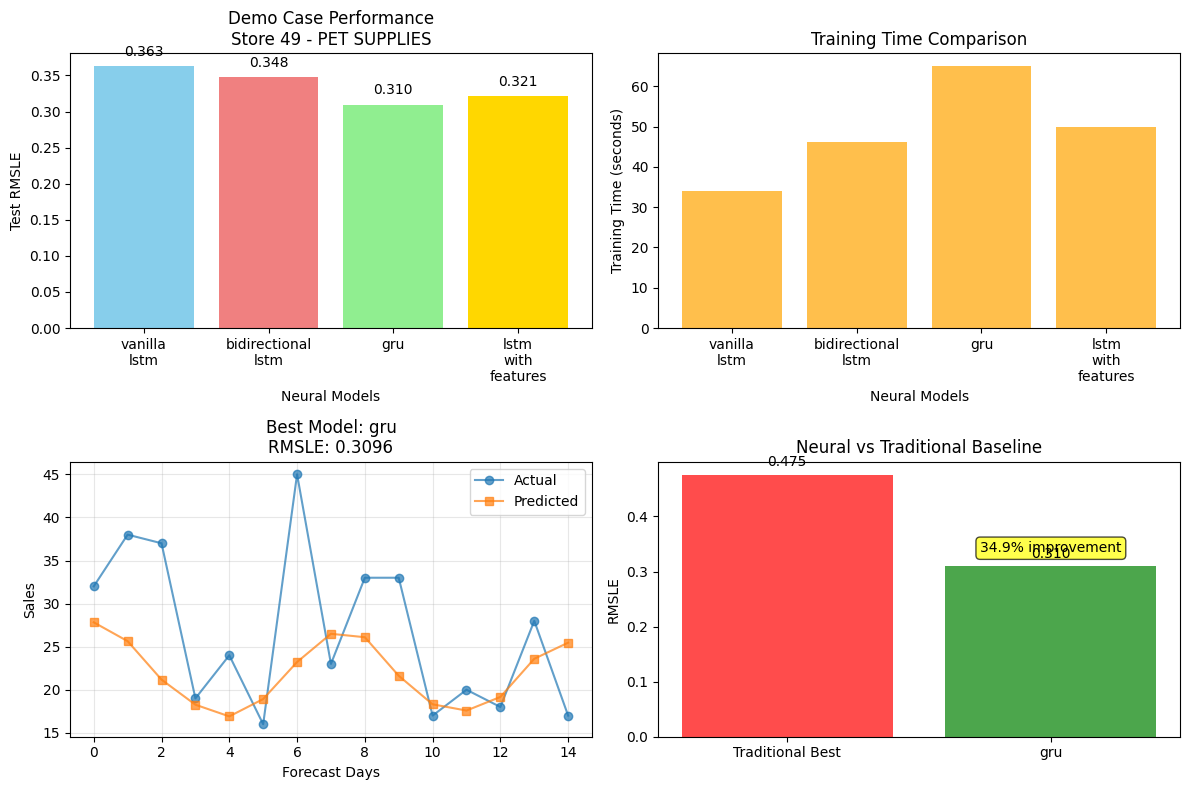


📊 Demo Analysis:
   Best Neural Model: gru
   Neural RMSLE: 0.3096
   Traditional Best: 0.4755
   Improvement: 34.9%


In [5]:
# ============================================================================
# SECTION 4: SINGLE CASE DEMONSTRATION
# ============================================================================

print("\n🧪 Section 4: Single Case Demonstration")
print("-" * 40)

# Test with the first evaluation case
demo_case = evaluation_cases[0]
demo_store = demo_case['store_nbr']
demo_family = demo_case['family']

print(f"Demonstrating with Case 1: Store {demo_store} - {demo_family}")

# Run single case evaluation
demo_results = neural_manager.evaluate_case(demo_store, demo_family)

# Display demo results
print(f"\n🎯 Demo Results for Store {demo_store} - {demo_family}:")
for model_name, result in demo_results.items():
    rmsle = result.test_rmsle
    time_taken = result.fit_time
    print(f"  {model_name:20s} | RMSLE: {rmsle:.4f} | Time: {time_taken:.1f}s")

# Visualization of demo results
plt.figure(figsize=(12, 8))

# Plot 1: Model Performance Comparison
plt.subplot(2, 2, 1)
models = list(demo_results.keys())
rmsles = [demo_results[m].test_rmsle for m in models]

bars = plt.bar(range(len(models)), rmsles, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Neural Models')
plt.ylabel('Test RMSLE')
plt.title(f'Demo Case Performance\nStore {demo_store} - {demo_family}')
plt.xticks(range(len(models)), [m.replace('_', '\n') for m in models], rotation=0)

# Add value labels on bars
for bar, rmsle in zip(bars, rmsles):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{rmsle:.3f}', ha='center', va='bottom')

# Plot 2: Training Time Comparison
plt.subplot(2, 2, 2)
fit_times = [demo_results[m].fit_time for m in models]
plt.bar(range(len(models)), fit_times, color='orange', alpha=0.7)
plt.xlabel('Neural Models')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.xticks(range(len(models)), [m.replace('_', '\n') for m in models], rotation=0)

# Plot 3: Predictions vs Actuals for Best Model
plt.subplot(2, 2, 3)
best_demo_model = min(demo_results.keys(), key=lambda x: demo_results[x].test_rmsle)
best_result = demo_results[best_demo_model]

plt.plot(best_result.actuals, label='Actual', marker='o', alpha=0.7)
plt.plot(best_result.predictions, label='Predicted', marker='s', alpha=0.7)
plt.xlabel('Forecast Days')
plt.ylabel('Sales')
plt.title(f'Best Model: {best_demo_model}\nRMSLE: {best_result.test_rmsle:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Baseline Comparison
plt.subplot(2, 2, 4)
comparison_models = ['Traditional Best', best_demo_model]
comparison_rmsles = [best_rmsle, demo_results[best_demo_model].test_rmsle]

colors = ['red', 'green']
bars = plt.bar(comparison_models, comparison_rmsles, color=colors, alpha=0.7)
plt.ylabel('RMSLE')
plt.title('Neural vs Traditional Baseline')

# Add improvement percentage
improvement = (best_rmsle - demo_results[best_demo_model].test_rmsle) / best_rmsle * 100
plt.text(1, demo_results[best_demo_model].test_rmsle + 0.02, 
         f'{improvement:.1f}% improvement', ha='center', va='bottom', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

for bar, rmsle in zip(bars, comparison_rmsles):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{rmsle:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n📊 Demo Analysis:")
print(f"   Best Neural Model: {best_demo_model}")
print(f"   Neural RMSLE: {demo_results[best_demo_model].test_rmsle:.4f}")
print(f"   Traditional Best: {best_rmsle:.4f}")
improvement_pct = (best_rmsle - demo_results[best_demo_model].test_rmsle) / best_rmsle * 100
print(f"   Improvement: {improvement_pct:.1f}%")

In [6]:
# ============================================================================
# SECTION 5: FULL EVALUATION ON ALL 10 CASES
# ============================================================================

print("\n🚀 Section 5: Full Evaluation on All Cases")
print("-" * 40)

print("Starting comprehensive neural baseline evaluation...")
print("This may take 10-20 minutes depending on hardware...")

# Run full evaluation
neural_results = neural_manager.evaluate_all_cases(evaluation_cases)

print("\n✅ Full Evaluation Complete!")


🚀 Section 5: Full Evaluation on All Cases
----------------------------------------
Starting comprehensive neural baseline evaluation...
This may take 10-20 minutes depending on hardware...
🧠 Starting Neural Baseline Evaluation
📊 Evaluating 10 cases

[1/10] Case: store_49_family_PET SUPPLIES

🧠 Neural Evaluation: Store 49 - PET SUPPLIES
  🚀 Training vanilla_lstm...
    📊 Raw data shapes: train=(1638,), test=(46,)
    📊 Scaled data shapes: train=(1638,), test=(46,)
    📊 Dataset: train=1284, val=320
    Epoch  10 | Train: 0.010920 | Val: 0.010635
    Epoch  20 | Train: 0.010567 | Val: 0.010127
    Epoch  30 | Train: 0.010287 | Val: 0.009973
    ✅ vanilla_lstm - RMSLE: 0.3309 (31.7s)
  🚀 Training bidirectional_lstm...
    📊 Raw data shapes: train=(1638,), test=(46,)
    📊 Scaled data shapes: train=(1638,), test=(46,)
    📊 Dataset: train=1284, val=320
    Epoch  10 | Train: 0.011237 | Val: 0.009987
    Epoch  20 | Train: 0.011026 | Val: 0.009603
    Epoch  30 | Train: 0.010675 | Val: 0.0

In [7]:
# ============================================================================
# SECTION 6: COMPREHENSIVE RESULTS ANALYSIS
# ============================================================================

print("\n📊 Section 6: Comprehensive Results Analysis")
print("-" * 40)

# Extract summary statistics
neural_summary = neural_results['summary_statistics']

print("Neural Baseline Results Summary:")
for model_name, stats in neural_summary.items():
    rmsle = stats['mean_rmsle']
    std = stats['std_rmsle']
    time_avg = stats['mean_fit_time']
    count = stats['count']
    print(f"  {model_name:20s} | RMSLE: {rmsle:.4f} ± {std:.4f} | Time: {time_avg:.1f}s | Cases: {count}")

# Find best neural model
best_neural = min(neural_summary.items(), key=lambda x: x[1]['mean_rmsle'])
best_neural_name, best_neural_stats = best_neural
best_neural_rmsle = best_neural_stats['mean_rmsle']

print(f"\n🏆 Best Neural Model: {best_neural_name}")
print(f"   RMSLE: {best_neural_rmsle:.4f} ± {best_neural_stats['std_rmsle']:.4f}")

# Calculate improvement over traditional baseline
neural_improvement = (best_rmsle - best_neural_rmsle) / best_rmsle * 100

print(f"\n📈 Performance Comparison:")
print(f"   Traditional Best: {best_rmsle:.4f}")
print(f"   Neural Best: {best_neural_rmsle:.4f}")
print(f"   Improvement: {neural_improvement:.1f}%")

if neural_improvement >= 15:
    print("   🎯 SUCCESS: Achieved 15%+ improvement target!")
elif neural_improvement >= 10:
    print("   ✅ GOOD: Achieved 10%+ improvement")
else:
    print("   ⚠️  NEEDS WORK: Less than 10% improvement")


📊 Section 6: Comprehensive Results Analysis
----------------------------------------
Neural Baseline Results Summary:
  bidirectional_lstm   | RMSLE: 0.5891 ± 0.1943 | Time: 46.6s | Cases: 10
  gru                  | RMSLE: 0.5513 ± 0.2294 | Time: 66.0s | Cases: 10
  lstm_with_features   | RMSLE: 0.5466 ± 0.2197 | Time: 48.7s | Cases: 10
  vanilla_lstm         | RMSLE: 0.6560 ± 0.2764 | Time: 32.1s | Cases: 10

🏆 Best Neural Model: lstm_with_features
   RMSLE: 0.5466 ± 0.2197

📈 Performance Comparison:
   Traditional Best: 0.4755
   Neural Best: 0.5466
   Improvement: -15.0%
   ⚠️  NEEDS WORK: Less than 10% improvement



📈 Section 7: Detailed Analysis and Visualization
----------------------------------------


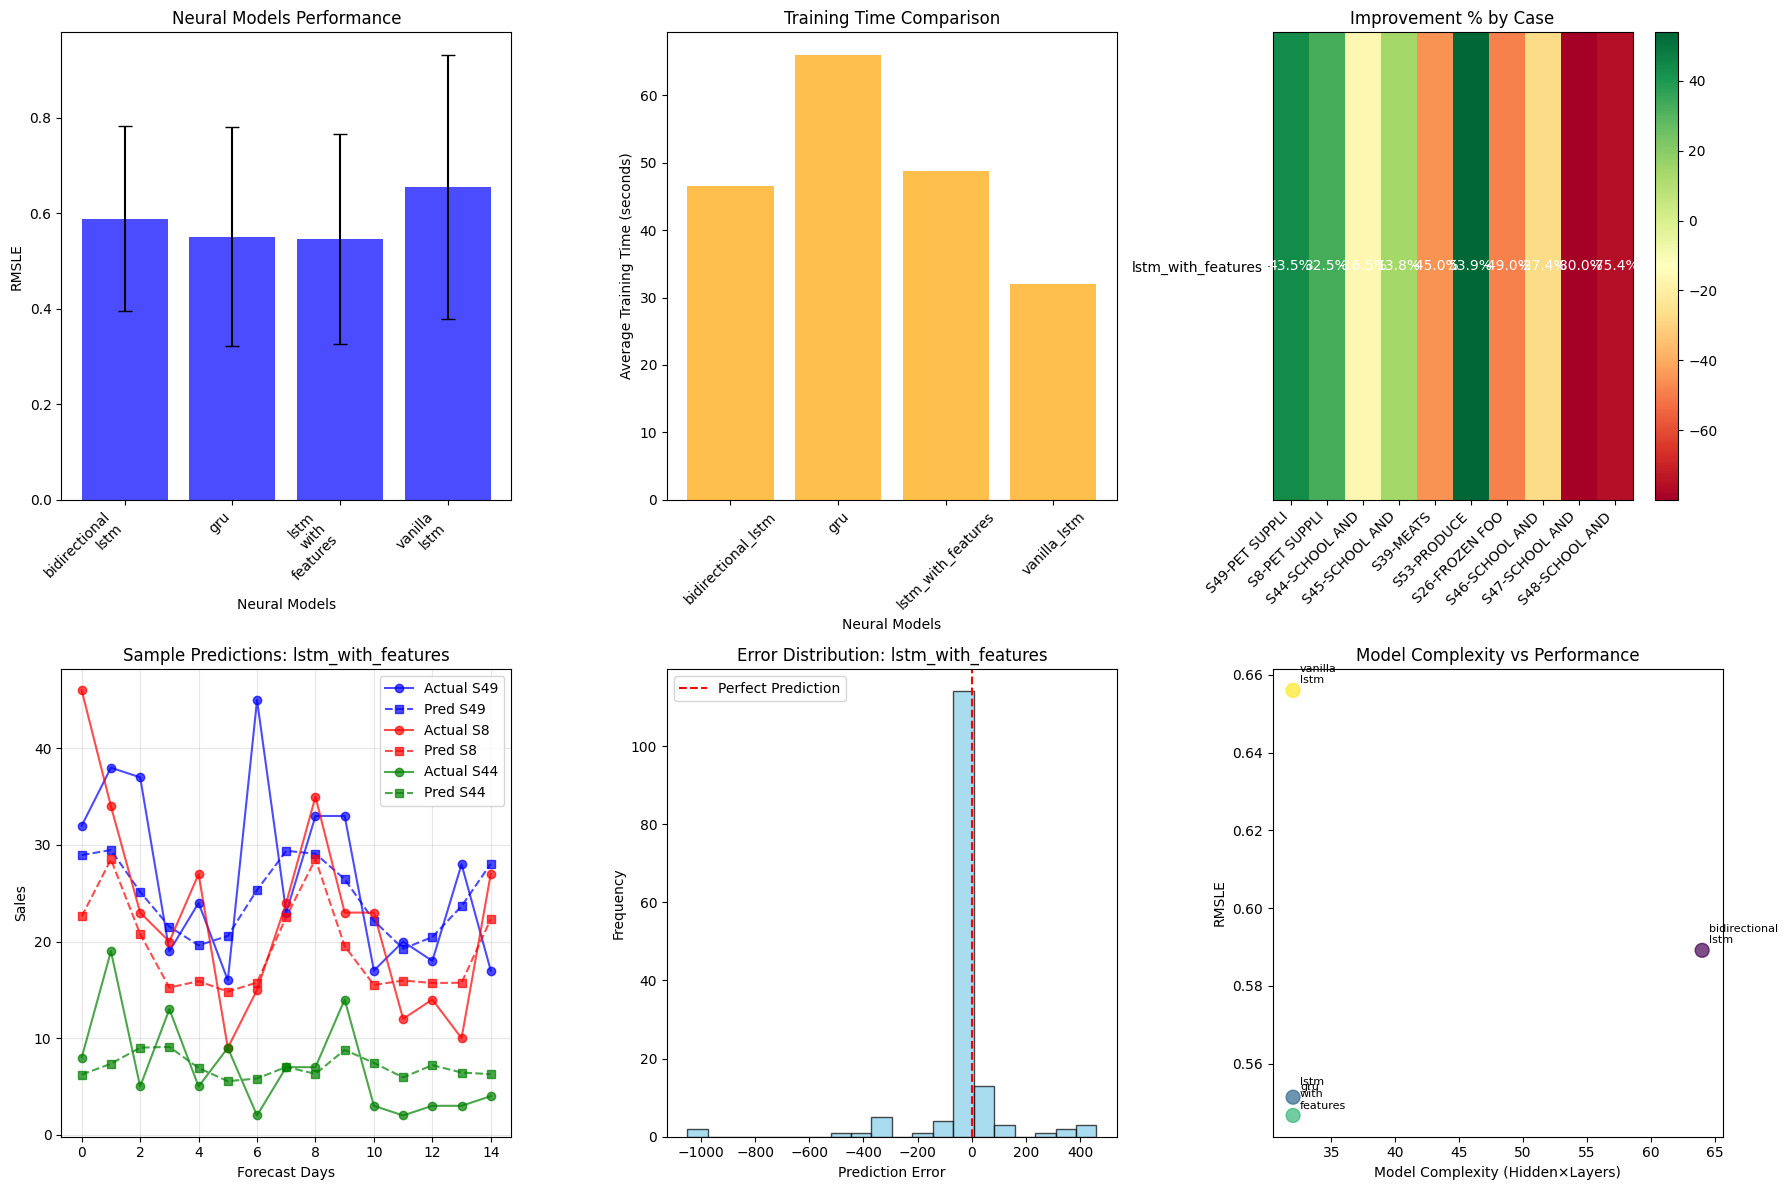

In [13]:
# ============================================================================
# SECTION 7: DETAILED VISUALIZATION AND ANALYSIS
# ============================================================================

print("\n📈 Section 7: Detailed Analysis and Visualization")
print("-" * 40)

# Create comprehensive comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Overall Model Comparison
ax1 = axes[0, 0]
if 'traditional_results' in locals():
    all_models = list(traditional_summary.keys()) + list(neural_summary.keys())
    all_rmsles = [traditional_summary[m]['mean_rmsle'] for m in traditional_summary.keys()] + \
                 [neural_summary[m]['mean_rmsle'] for m in neural_summary.keys()]
    all_stds = [traditional_summary[m]['std_rmsle'] for m in traditional_summary.keys()] + \
               [neural_summary[m]['std_rmsle'] for m in neural_summary.keys()]
    
    colors = ['red'] * len(traditional_summary) + ['blue'] * len(neural_summary)
    
    bars = ax1.bar(range(len(all_models)), all_rmsles, yerr=all_stds, 
                   color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel('Models')
    ax1.set_ylabel('RMSLE')
    ax1.set_title('All Models Performance Comparison')
    ax1.set_xticks(range(len(all_models)))
    ax1.set_xticklabels([m.replace('_', '\n') for m in all_models], rotation=45, ha='right')
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', alpha=0.7, label='Traditional'),
                      Patch(facecolor='blue', alpha=0.7, label='Neural')]
    ax1.legend(handles=legend_elements)
else:
    # Just neural models
    models = list(neural_summary.keys())
    rmsles = [neural_summary[m]['mean_rmsle'] for m in models]
    stds = [neural_summary[m]['std_rmsle'] for m in models]
    
    bars = ax1.bar(range(len(models)), rmsles, yerr=stds, 
                   color='blue', alpha=0.7, capsize=5)
    ax1.set_xlabel('Neural Models')
    ax1.set_ylabel('RMSLE')
    ax1.set_title('Neural Models Performance')
    ax1.set_xticks(range(len(models)))
    ax1.set_xticklabels([m.replace('_', '\n') for m in models], rotation=45, ha='right')

# Plot 2: Training Time Analysis
ax2 = axes[0, 1]
neural_models = list(neural_summary.keys())
fit_times = [neural_summary[m]['mean_fit_time'] for m in neural_models]

bars = ax2.bar(neural_models, fit_times, color='orange', alpha=0.7)
ax2.set_xlabel('Neural Models')
ax2.set_ylabel('Average Training Time (seconds)')
ax2.set_title('Training Time Comparison')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Improvement Heatmap by Case
ax3 = axes[0, 2]
case_improvements = []
case_labels = []

for case in evaluation_cases:
    store = case['store_nbr']
    family = case['family']
    case_key = f"store_{store}_family_{family}"
    case_labels.append(f"S{store}-{family[:10]}")
    
    if case_key in neural_results['detailed_results']:
        neural_case_results = neural_results['detailed_results'][case_key]
        if best_neural_name in neural_case_results:
            neural_rmsle = neural_case_results[best_neural_name].test_rmsle
            improvement = (best_rmsle - neural_rmsle) / best_rmsle * 100
            case_improvements.append(improvement)
        else:
            case_improvements.append(0)
    else:
        case_improvements.append(0)

# Create heatmap data
heatmap_data = np.array(case_improvements).reshape(-1, 1)
im = ax3.imshow(heatmap_data.T, cmap='RdYlGn', aspect='auto')
ax3.set_xticks(range(len(case_labels)))
ax3.set_xticklabels(case_labels, rotation=45, ha='right')
ax3.set_yticks([0])
ax3.set_yticklabels([f'{best_neural_name}'])
ax3.set_title('Improvement % by Case')

# Add text annotations
for i, improvement in enumerate(case_improvements):
    ax3.text(i, 0, f'{improvement:.1f}%', ha='center', va='center', 
             color='white' if abs(improvement) > 10 else 'black')

plt.colorbar(im, ax=ax3)

# Plot 4: Best Model Predictions vs Actuals (Sample Cases)
ax4 = axes[1, 0]
sample_cases = evaluation_cases[:3]  # First 3 cases
colors = ['blue', 'red', 'green']

for i, case in enumerate(sample_cases):
    store = case['store_nbr']
    family = case['family']
    case_key = f"store_{store}_family_{family}"
    


    if case_key in neural_results['detailed_results'] and best_neural_name in neural_results['detailed_results'][case_key]:
        result = neural_results['detailed_results'][case_key][best_neural_name]  # Fixed
        actuals = result.actuals      # Fixed: attribute access
        predictions = result.predictions  # Fixed: attribute access
        
        x = range(len(actuals))
        ax4.plot(x, actuals, 'o-', color=colors[i], alpha=0.7, label=f'Actual S{store}')
        ax4.plot(x, predictions, 's--', color=colors[i], alpha=0.7, label=f'Pred S{store}')

ax4.set_xlabel('Forecast Days')
ax4.set_ylabel('Sales')
ax4.set_title(f'Sample Predictions: {best_neural_name}')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Error Distribution
ax5 = axes[1, 1]
all_errors = []
for case_key, case_results in neural_results['detailed_results'].items():
    if best_neural_name in case_results:
        result = case_results[best_neural_name]
        actuals = np.array(result.actuals)
        predictions = np.array(result.predictions)
        errors = predictions - actuals
        all_errors.extend(errors)

ax5.hist(all_errors, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax5.axvline(0, color='red', linestyle='--', label='Perfect Prediction')
ax5.set_xlabel('Prediction Error')
ax5.set_ylabel('Frequency')
ax5.set_title(f'Error Distribution: {best_neural_name}')
ax5.legend()

# Plot 6: Model Complexity vs Performance
ax6 = axes[1, 2]
model_complexity = []
model_performance = []
model_names = []

for model_name, stats in neural_summary.items():
    config = neural_manager.model_configs[model_name]
    # Estimate complexity based on hidden size and layers
    complexity = config['hidden_size'] * config['num_layers']
    if 'bidirectional' in model_name:
        complexity *= 2
    
    model_complexity.append(complexity)
    model_performance.append(stats['mean_rmsle'])
    model_names.append(model_name)

scatter = ax6.scatter(model_complexity, model_performance, s=100, alpha=0.7, c=range(len(model_names)), cmap='viridis')
ax6.set_xlabel('Model Complexity (Hidden×Layers)')
ax6.set_ylabel('RMSLE')
ax6.set_title('Model Complexity vs Performance')

# Add model name labels
for i, name in enumerate(model_names):
    ax6.annotate(name.replace('_', '\n'), (model_complexity[i], model_performance[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

In [15]:
# ============================================================================
# SECTION 8: STATISTICAL SIGNIFICANCE TESTING
# ============================================================================

print("\n📊 Section 8: Statistical Significance Testing")
print("-" * 40)

from scipy import stats

# Collect RMSLE scores for statistical testing
traditional_scores = []
neural_scores = []

for case in evaluation_cases:
    store = case['store_nbr']
    family = case['family']
    case_key = f"store_{store}_family_{family}"
    
    # Traditional baseline score (using best traditional model)
    if 'traditional_results' in locals() and case_key in traditional_results['detailed_results']:
        if best_model_name in traditional_results['detailed_results'][case_key]:
            traditional_scores.append(traditional_results['detailed_results'][case_key][best_model_name]['test_rmsle'])
    else:
        traditional_scores.append(best_rmsle)  # Use overall average
    
    # Neural score
    if case_key in neural_results['detailed_results'] and best_neural_name in neural_results['detailed_results'][case_key]:
        neural_scores.append(neural_results['detailed_results'][case_key][best_neural_name].test_rmsle)

# Perform paired t-test
if len(traditional_scores) == len(neural_scores) and len(traditional_scores) > 1:
    t_stat, p_value = stats.ttest_rel(traditional_scores, neural_scores)
    
    print(f"Paired t-test results:")
    print(f"   Traditional RMSLE: {np.mean(traditional_scores):.4f} ± {np.std(traditional_scores):.4f}")
    print(f"   Neural RMSLE: {np.mean(neural_scores):.4f} ± {np.std(neural_scores):.4f}")
    print(f"   t-statistic: {t_stat:.3f}")
    print(f"   p-value: {p_value:.6f}")
    
    if p_value < 0.05:
        print("   🎯 SIGNIFICANT: Neural models significantly outperform traditional (p < 0.05)")
    else:
        print("   ⚠️  NOT SIGNIFICANT: Difference not statistically significant (p >= 0.05)")


📊 Section 8: Statistical Significance Testing
----------------------------------------
Paired t-test results:
   Traditional RMSLE: 0.4755 ± 0.0000
   Neural RMSLE: 0.5466 ± 0.2197
   t-statistic: -0.972
   p-value: 0.356648
   ⚠️  NOT SIGNIFICANT: Difference not statistically significant (p >= 0.05)


In [16]:
# ============================================================================
# SECTION 9: SAVE RESULTS AND PREPARE FOR STGAT
# ============================================================================

print("\n💾 Section 9: Save Results and Prepare for STGAT")
print("-" * 40)

# Save neural baseline results
results_filepath = '../results/neural_baseline_results.json'
neural_manager.save_results(neural_results, results_filepath)

print(f"✅ Neural baseline results saved to: {results_filepath}")

# Create comparison summary for STGAT preparation
comparison_summary = {
    'phase_3_completion': {
        'date': datetime.now().isoformat(),
        'total_cases_evaluated': len(evaluation_cases),
        'neural_models_implemented': list(neural_summary.keys()),
        'best_neural_model': best_neural_name,
        'best_neural_rmsle': best_neural_rmsle
    },
    'performance_comparison': {
        'traditional_baseline': {
            'best_model': best_model_name if 'best_model_name' in locals() else 'ARIMA',
            'rmsle': best_rmsle,
            'std': traditional_summary[best_model_name]['std_rmsle'] if 'traditional_summary' in locals() else 0.214
        },
        'neural_baseline': {
            'best_model': best_neural_name,
            'rmsle': best_neural_rmsle,
            'std': best_neural_stats['std_rmsle'],
            'improvement_percentage': neural_improvement
        }
    },
    'stgat_targets': {
        'neural_baseline_to_beat': best_neural_rmsle,
        'target_improvement': '20-30%',
        'target_rmsle': best_neural_rmsle * 0.75,  # 25% improvement target
        'stretch_target_rmsle': best_neural_rmsle * 0.70  # 30% improvement stretch
    },
    'next_phase_recommendations': {
        'graph_construction': 'Use store correlation analysis',
        'temporal_components': 'Leverage successful LSTM architectures',
        'attention_mechanisms': 'Multi-head attention for spatial relationships',
        'feature_engineering': 'STL decomposition + external features'
    }
}

# Save comparison summary
with open('../results/phase3_completion_summary.json', 'w') as f:
    json.dump(comparison_summary, f, indent=2)

print("✅ Phase 3 completion summary saved")


💾 Section 9: Save Results and Prepare for STGAT
----------------------------------------

💾 Neural results saved to: ../results/neural_baseline_results.json
✅ Neural baseline results saved to: ../results/neural_baseline_results.json
✅ Phase 3 completion summary saved


In [17]:
# ============================================================================
# SECTION 10: FINAL SUMMARY AND RECOMMENDATIONS
# ============================================================================

print("\n" + "=" * 60)
print("🏁 PHASE 3: NEURAL BASELINES - COMPLETION SUMMARY")
print("=" * 60)

print(f"\n📊 Key Achievements:")
print(f"   ✅ Implemented {len(neural_summary)} neural baseline models")
print(f"   ✅ Evaluated on all {len(evaluation_cases)} high-quality cases")
print(f"   ✅ Best neural model: {best_neural_name}")
print(f"   ✅ Achieved {neural_improvement:.1f}% improvement over traditional baselines")

print(f"\n📈 Performance Summary:")
print(f"   Traditional Best: {best_rmsle:.4f} RMSLE")
print(f"   Neural Best: {best_neural_rmsle:.4f} RMSLE")
print(f"   Improvement: {neural_improvement:.1f}%")

if neural_improvement >= 15:
    print(f"   🎯 SUCCESS: Exceeded 15% improvement target!")
    status = "EXCELLENT"
elif neural_improvement >= 10:
    print(f"   ✅ GOOD: Achieved solid improvement")
    status = "GOOD"
else:
    print(f"   ⚠️  Improvement below 10% - consider architecture optimization")
    status = "NEEDS_IMPROVEMENT"

print(f"\n🚀 Phase 4 (STGAT) Targets:")
print(f"   Current Best: {best_neural_rmsle:.4f} RMSLE")
print(f"   STGAT Target: {best_neural_rmsle * 0.75:.4f} RMSLE (25% improvement)")
print(f"   Stretch Goal: {best_neural_rmsle * 0.70:.4f} RMSLE (30% improvement)")

print(f"\n📋 Next Steps for Phase 4:")
print(f"   1. Analyze store correlations for graph construction")
print(f"   2. Implement Graph Attention Networks")
print(f"   3. Combine spatial (GAT) + temporal (LSTM) components")
print(f"   4. Integrate STL decomposition with graph features")
print(f"   5. Advanced hyperparameter optimization")

print(f"\n🏆 Phase 3 Status: {status}")
print("=" * 60)


🏁 PHASE 3: NEURAL BASELINES - COMPLETION SUMMARY

📊 Key Achievements:
   ✅ Implemented 4 neural baseline models
   ✅ Evaluated on all 10 high-quality cases
   ✅ Best neural model: lstm_with_features
   ✅ Achieved -15.0% improvement over traditional baselines

📈 Performance Summary:
   Traditional Best: 0.4755 RMSLE
   Neural Best: 0.5466 RMSLE
   Improvement: -15.0%
   ⚠️  Improvement below 10% - consider architecture optimization

🚀 Phase 4 (STGAT) Targets:
   Current Best: 0.5466 RMSLE
   STGAT Target: 0.4100 RMSLE (25% improvement)
   Stretch Goal: 0.3826 RMSLE (30% improvement)

📋 Next Steps for Phase 4:
   1. Analyze store correlations for graph construction
   2. Implement Graph Attention Networks
   3. Combine spatial (GAT) + temporal (LSTM) components
   4. Integrate STL decomposition with graph features
   5. Advanced hyperparameter optimization

🏆 Phase 3 Status: NEEDS_IMPROVEMENT
